# Mapping from high-dimensional data to low-dimensional data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(500)

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0, 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3 + np.random.normal(0, 10, size=100)

In [3]:
from PCA import PCA

In [4]:
pca = PCA(n_components=1)

In [5]:
pca.fit(X)

PCA(n_components=1)

In [6]:
pca.components_

array([[0.74974184, 0.66173044]])

In [7]:
X_reduction = pca.transform(X)

In [8]:
X_reduction.shape

(100, 1)

In [9]:
X_restore = pca.inverse_transform(X_reduction)

In [10]:
X_restore.shape

(100, 2)

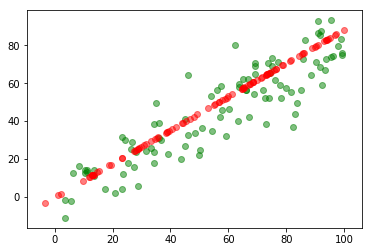

In [11]:
plt.scatter(X[:, 0], X[:, 1], color='g', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)

# PCA in Scikit Learn

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=1)

In [14]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_

array([[-0.74974156, -0.66173075]])

In [16]:
X_reduction = pca.transform(X)

In [17]:
X_reduction.shape

(100, 1)

In [18]:
X_restore = pca.inverse_transform(X_reduction)

In [19]:
X_restore.shape

(100, 2)

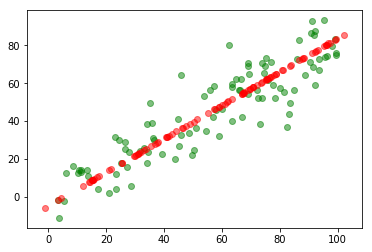

In [20]:
plt.scatter(X[:, 0], X[:, 1], color='g', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)

In [21]:
from sklearn import datasets

In [22]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=500)

In [24]:
X_train.shape

(1347, 64)

In [25]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 4.05 ms, sys: 1.65 ms, total: 5.7 ms
Wall time: 4.74 ms


In [26]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [27]:
pca1 = PCA(0.95)
pca1.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
X_train_reduction = pca1.transform(X_train)
X_test_reduction = pca1.transform(X_test)

In [29]:
%%time

knn_clf1 = KNeighborsClassifier()
knn_clf1.fit(X_train_reduction, y_train)

CPU times: user 2.69 ms, sys: 1.75 ms, total: 4.44 ms
Wall time: 3.12 ms


In [30]:
pca1.n_components_

28

In [31]:
knn_clf1.score(X_test_reduction, y_test)

0.9844444444444445